<a href="https://colab.research.google.com/github/Ayushcode04/codemypandas-pytrch/blob/main/simple_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [4]:
# create a Model class that inherits nn. module
class Model(nn.Module):
  # i/p layer (4 features)
  # hidden layer
  # o/p (3 class of iris)
  def __init__(self,in_features=4, h1=8,h2=9,out_features=3):
    super().__init__()
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,out_features)

  def forward(self,x):
    x=F.relu(self.fc1(x))  #rectified linear unit
    x=F.relu(self.fc2(x))
    x= self.out(x)

    return x

In [5]:
# create manual seed for randomization
torch.manual_seed(41)
# create an instance model
model=Model()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
url ='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df =pd.read_csv(url)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [8]:
# change last col from str to  int
my_df['variety']=my_df['variety'].replace('Setosa',0.0)
my_df['variety']=my_df['variety'].replace('Versicolor',1.0)
my_df['variety']=my_df['variety'].replace('Virginica',2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [9]:
# train,t,s  set X,y
# x is feat.
# y is outcome
X=my_df.drop('variety',axis=1)
y=my_df['variety']

In [10]:
# convert in np arrays
X=X.values
y=y.values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# TTs
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)


In [13]:
# convert x to tensors float
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)

In [14]:
# convert y labels to tensors long
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [15]:
# set criterion  of model to measure error,far of prd are from data
criterion=nn.CrossEntropyLoss()
# choose optimizer,lr=learning rate(if error doesnt go down as we learn after bunch of iterarion (epochs)lower learning rate)
optimizer =torch.optim.Adam(model.parameters(),lr=0.01)

In [20]:
# train model
# epochs?(one run thru all training data in network)
epochs = 100
losses=[]
for i in range(epochs):
  # go forward
  y_pred=model.forward(X_train) #get predicted result

  # measure loss/err ,gonna be high at 1
  loss=criterion(y_pred,y_train) #predicted values vs y_train

  # keep track of our loss
  losses.append(loss.detach().numpy())
  # print every 10 epochs
  if i%10 ==0:
    print(f'Epoch:{i}and loss:{loss}')
    # do some back propogation :take error rate of forward and feed it back
    # thru the network to finetune weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch:0and loss:0.585993230342865
Epoch:10and loss:0.5657215118408203
Epoch:20and loss:0.5457809567451477
Epoch:30and loss:0.5259074568748474
Epoch:40and loss:0.5063217282295227
Epoch:50and loss:0.48723843693733215
Epoch:60and loss:0.4688112437725067
Epoch:70and loss:0.4506761431694031
Epoch:80and loss:0.43326106667518616
Epoch:90and loss:0.416587233543396


Text(0.5, 0, 'Epo')

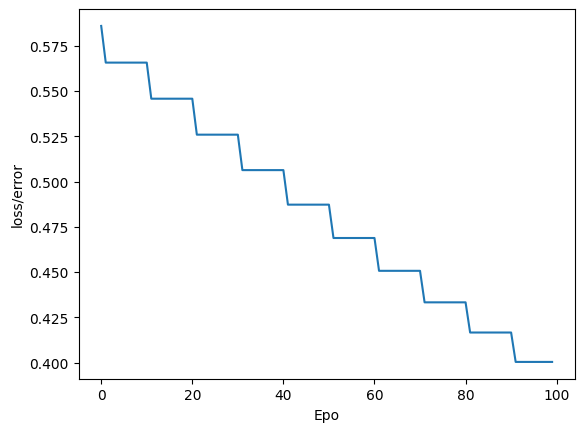

In [21]:
# graph
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

In [22]:
# evaluate model on test data (validate on test set)
with torch.no_grad():  #back propogation turned off
  y_eval= model.forward(X_test) # # X_test are features from our test set, y_eval will be predictions
  loss=criterion(y_eval,y_test)# # Find the loss or error


In [23]:
loss

tensor(0.4457)

In [33]:
correct=0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val=model.forward(data)

    if y_test[i] ==0:
      x='Setosa'
    elif y_test[i]==1:
      x='Versicolor'
    else:
      x='Virginica'

    # will tell us type of flower class our net think it is
    print(f'{i+1}.){str(y_val)}\t {y_test[i]} \t {y_val.argmax().item()}')

    #correct or not
    if y_val.argmax().item()==y_test[i]:
      correct +=1
print(f"We got{correct}correct")

1.)tensor([-1.6589,  1.8628,  2.3521])	 2 	 2
2.)tensor([-2.2055,  2.1448,  3.2156])	 2 	 2
3.)tensor([-2.5470,  2.4017,  3.6011])	 2 	 2
4.)tensor([-1.2339,  1.7194,  1.5578])	 1 	 1
5.)tensor([-2.1216,  2.1493,  2.9944])	 2 	 2
6.)tensor([-0.8118,  1.4636,  1.0332])	 1 	 1
7.)tensor([-1.7033,  1.9230,  2.3492])	 2 	 2
8.)tensor([-1.2284,  1.7222,  1.5399])	 1 	 1
9.)tensor([-1.9114,  2.0366,  2.6710])	 2 	 2
10.)tensor([-2.3951,  2.2704,  3.4690])	 2 	 2
11.)tensor([-1.6345,  1.8875,  2.2510])	 2 	 2
12.)tensor([ 1.5030, -0.3247, -0.8859])	 0 	 0
13.)tensor([ 1.4104, -0.2508, -0.8657])	 0 	 0
14.)tensor([-0.3438,  1.1088,  0.5078])	 1 	 1
15.)tensor([ 1.2819, -0.1523, -0.7736])	 0 	 0
16.)tensor([-1.5796,  1.8740,  2.1468])	 2 	 2
17.)tensor([ 1.4051, -0.2466, -0.8645])	 0 	 0
18.)tensor([-1.6616,  1.8804,  2.3384])	 1 	 2
19.)tensor([ 1.5498, -0.3619, -0.8961])	 0 	 0
20.)tensor([ 1.2723, -0.1429, -0.8073])	 0 	 0
21.)tensor([-0.5337,  1.2523,  0.7238])	 1 	 1
22.)tensor([-2.3033,  

In [53]:
new_iris=torch.tensor([5.0,3.6,1.4,0.2])

In [54]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 1.5376, -0.3522, -0.8935])


In [41]:
newer_iris = torch.tensor([5.9,3.0,5.1,1.8])

In [42]:
with torch.no_grad():
  print(model(newer_iris))

tensor([-1.7247,  1.9086,  2.4468])


In [55]:
# Save & load NN model
torch.save(model.state_dict(),'my_really_awesome_iris_model.pt')
new_model =Model()
new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))

<All keys matched successfully>

In [57]:
# check loaded
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)